<a href="https://colab.research.google.com/github/JumongEric/Kigali_Waste_Management_System/blob/main/Waster_management_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data path
import copy
train_pat="/content/drive/MyDrive/Waste management system/TRAIN"
test_pat="/content/drive/MyDrive/Waste management system/Test"
train_path=copy.copy(train_pat)
test_path=copy.copy(test_pat)


In [ ]:
# data augmentation but will try this later to improve generalization
train_datagen = ImageDataGenerator(
   shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen= ImageDataGenerator(
   shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Then with ImageData generator we can load our data.
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Waste management system/TRAIN'

In [ ]:
#Lets check class distribution
classes = os.listdir(train_path)
class_counts = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in classes]

plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Waste management system/TRAIN'

In [ ]:
# Let's augmented Organic data
import cv2
import os

# Specifing the path for dataset
original_train_data_path =train_path
original_test_data_path=test_path

# path for saving augmented dataset
augmented_train_data_path = "/content/drive/MyDrive/Waste management system/AgumentedTrain"
augmented_test_data_path="/content/drive/MyDrive/Waste management system/AgumentedTest"

# Ensure the augmented dataset directory exists
os.makedirs(augmented_train_data_path, exist_ok=True)
os.makedirs(augmented_test_data_path, exist_ok=True)

# List the classes in your dataset
train_classes = os.listdir(original_train_data_path)
test_classes = os.listdir(original_test_data_path)

# Define the minority class (organic) and majority class (recyclable)
minority_class = "O"
majority_class = "R"

# Specify the desired number of augmented images for the minority class
desired_min_class_samples = 3000 # Adjust as needed

# Iterate over each class
for class_name in train_classes:
    class_path_original = os.path.join(original_train_data_path, class_name)
    class_path_augmented = os.path.join(augmented_train_data_path, class_name)

    # Ensure the augmented class directory exists
    os.makedirs(class_path_augmented, exist_ok=True)

    # Determine the number of images in the current class
    num_images = len(os.listdir(class_path_original))

    # Determine whether the current class is the minority or majority class
    is_minority_class = class_name == minority_class

    # Determine the number of augmented images needed for the minority class
    if is_minority_class:
        num_augmented_images = max(0, desired_min_class_samples - num_images)
    else:
        num_augmented_images = 0

    # Iterate over each image in the class
    for image_name in os.listdir(class_path_original):
        image_path_original = os.path.join(class_path_original, image_name)

        # Read the original image
        original_image = cv2.imread(image_path_original)

        # Apply data augmentation only to the minority class
        if is_minority_class:
            # Example: Rotation
            # Adjust parameters as needed
            angle = 50
            M = cv2.getRotationMatrix2D((original_image.shape[1] / 2, original_image.shape[0] / 2), angle, 1)
            augmented_image = cv2.warpAffine(original_image, M, (original_image.shape[1], original_image.shape[0]))

            # Save the augmented image
            augmented_image_name = f"augmented_{image_name}"
            augmented_image_path = os.path.join(class_path_augmented, augmented_image_name)
            cv2.imwrite(augmented_image_path, augmented_image)
        else:
            # Copy the original image for the majority class
            augmented_image_path = os.path.join(class_path_augmented, image_name)
            cv2.imwrite(augmented_image_path, original_image)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Waste management system/TRAIN'

In [ ]:
augmented_train_data_path = "/content/drive/MyDrive/Waste management system/AgumentedTrain"

# Number of images for training dataset

In [ ]:
train_classes = os.listdir(augmented_train_data_path)

# Dictionary to store class counts
class_counts = {}

# Iterate over each class
for class_name in train_classes:
    class_path = os.path.join(augmented_train_data_path, class_name)

    # Count the number of images in the class
    num_images = len([file for file in os.listdir(class_path) if file.endswith('.jpg')])  # Adjust the file extension as needed

    # Store the count in the dictionary
    class_counts[class_name] = num_images

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")

Class: O, Number of Images: 3740
Class: R, Number of Images: 9999


# Number of images in Testing dataset

In [ ]:
test_classes = os.listdir(test_path)

# Dictionary to store class counts
class_counts = {}

# Iterate over each class
for class_name in test_classes:
    class_path = os.path.join(test_path, class_name)

    # Count the number of images in the class
    num_images = len([file for file in os.listdir(class_path)])  # Adjust the file extension as needed

    # Store the count in the dictionary
    class_counts[class_name] = num_images

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")

Class: O, Number of Images: 1401
Class: R, Number of Images: 520


⏰# **It is clear that we still have imbalance in our both training and testing dataset so tha at least we have to increase the number of image for organic dataset up to 8 thousands. **

# Lest try to fit the model to the training dataset by using CNN

## 1. We start by spliting dataset for training, validation, and testing

In [ ]:
from sklearn.model_selection import train_test_split
test_path = test_path
classes = os.listdir(augmented_train_data_path)

class_paths = {}

# Iterating over each class
for class_name in classes:
    class_path = os.path.join(augmented_train_data_path, class_name)
    class_paths[class_name] = [os.path.join(class_path, file) for file in os.listdir(class_path)]

# Dictionary to store train and validation sets for each class
data_splits = {'train': {}, 'val': {}}
random_seed = 42

# Iterate over each class
for class_name, paths in class_paths.items():
    # Split the data into train and validation sets
    train_set, val_set = train_test_split(paths, test_size=0.2, random_state=random_seed)

    # Store the sets in the dictionary
    data_splits['train'][class_name] = train_set
    data_splits['val'][class_name] = val_set

# Print the number of samples in each set for each class
for split_name, split_data in data_splits.items():
    print(f"\n{split_name.capitalize()} Set:")
    for class_name, samples in split_data.items():
        print(f"Class: {class_name}, Number of Samples: {len(samples)}")


Train Set:
Class: O, Number of Samples: 2992
Class: R, Number of Samples: 7999

Val Set:
Class: O, Number of Samples: 748
Class: R, Number of Samples: 2000


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set the validation split
)

train_generator = train_datagen.flow_from_directory(
    augmented_train_data_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # or 'binary' depending on your problem
    subset='training'  # Specify 'training' for the training set
)

val_generator = train_datagen.flow_from_directory(
    augmented_train_data_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 10992 images belonging to 2 classes.
Found 2747 images belonging to 2 classes.


In [ ]:
test = train_datagen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 384 images belonging to 2 classes.


## 2. importing dependencies for Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model= Sequential()

In [ ]:
# Building a model by adding layers
model.add(Conv2D(16, (3,3), 1, activation= "relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 3. Training model by fitting it to the training data

We have to save our model so that anytime I can access the trained model




In [ ]:
logdir="logs"

In [ ]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

Saving the model

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
drive_path = '/content/drive/MyDrive/Waste management system'
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(drive_path, 'my_model.keras'),
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

In [ ]:
history=model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[tensorboard_callback, model_checkpoint_callback])

Epoch 1/10
344/344 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9612
Epoch 1: val_loss improved from inf to 0.04156, saving model to /content/drive/MyDrive/Waste management system/my_model.keras
344/344 [==============================] - 3453s 10s/step - loss: 0.1101 - accuracy: 0.9612 - val_loss: 0.0416 - val_accuracy: 0.9880
Epoch 2/10
344/344 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9865
Epoch 2: val_loss improved from 0.04156 to 0.02175, saving model to /content/drive/MyDrive/Waste management system/my_model.keras
344/344 [==============================] - 241s 702ms/step - loss: 0.0415 - accuracy: 0.9865 - val_loss: 0.0218 - val_accuracy: 0.9931
Epoch 3/10
344/344 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9909
Epoch 3: val_loss did not improve from 0.02175
344/344 [==============================] - 239s 696ms/step - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.0253 - val_accuracy: 0.9920
Epoch

In [ ]:
model.save('/content/drive/MyDrive/Waste management system/final_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/Waste management system/final_model.keras')

# Plotting model performance

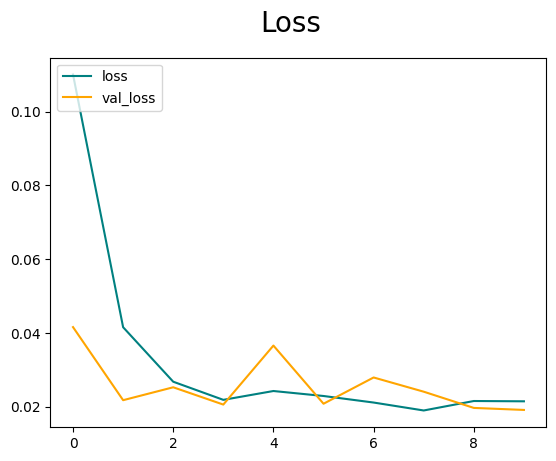

In [ ]:
fig= plt.figure()
plt.plot(history.history['loss'], color="teal", label="loss")
plt.plot(history.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

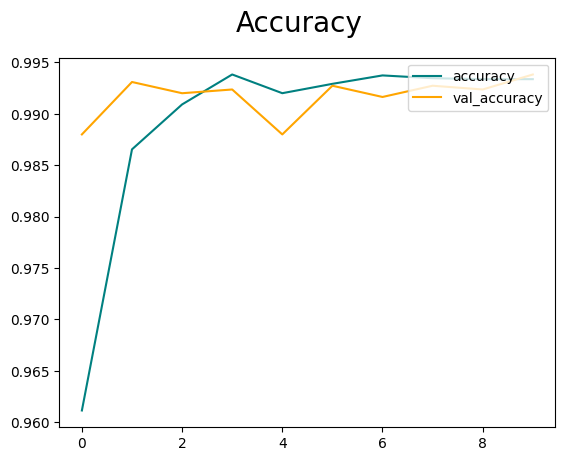

In [ ]:
fig=plt.figure()
plt.plot(history.history["accuracy"], color="teal", label="accuracy")
plt.plot(history.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper right")
plt.show()

# Evaluating model performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 1921 images belonging to 2 classes.


In [ ]:
import numpy as np
threshold = 0.5
for batch in range(len(test_generator)):
    X, y = next(test_generator)
    yhat = model.predict(X)
    yhat2 = np.reshape(yhat, (yhat.shape[0], -1))
    binary_predictions = (yhat2 > threshold).astype(int)
    y2 = np.reshape(y, (y.shape[0], -1))
    pre.update_state(y2, binary_predictions.argmax(axis=-1))
    re.update_state(y2, binary_predictions.argmax(axis=-1))


In [ ]:
precision_result = pre.result().numpy()
recall_result = re.result().numpy()

# accuracy based on true positives, true negatives, false positives, and false negatives
true_positives = np.sum((binary_predictions == 1) & (y2 == 1))
true_negatives = np.sum((binary_predictions == 0) & (y2 == 0))
false_positives = np.sum((binary_predictions == 1) & (y2 == 0))
false_negatives = np.sum((binary_predictions == 0) & (y2 == 1))
accuracy_result = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("Precision:", precision_result)
print("Recall:", recall_result)
print("Accuracy:", accuracy_result)

Precision: 0.10625
Recall: 0.098076925
Accuracy: 0.9779307047526041


# Precision: 0.10625 (approximately)

This indicates that when the model predicts the positive class, it is correct about 10.6% of the time. ⏬ We have to increase this if possible
Recall: 0.098076925 (approximately)

This suggests that the model is able to capture about 9.8% of the actual positive instances.
Accuracy: 0.9779307047526041 (approximately) ⏫ The same here, it will be great if we increase this.

This indicates the overall correctness of the model's predictions across all classes, and it's around 97.8%.::: ✅ So far so good.
# Thus, I would propose to keep it like this because I have trained this model for 2 days, but if we get a high speed internet and strong computer we can increase the Precision and Recall.